<a href="https://colab.research.google.com/github/cristinaesuper/WIDS/blob/main/WIDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup**

In [109]:
import sys
import sklearn
import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

WIDS_FILE_PATH = './input/train.csv'

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def load_WIDS_data(csv_path=WIDS_FILE_PATH):
    return pd.read_csv(csv_path)

data = load_WIDS_data()

# print(data.describe())

# **See histograms**

Saving figure attribute_histograms_plots


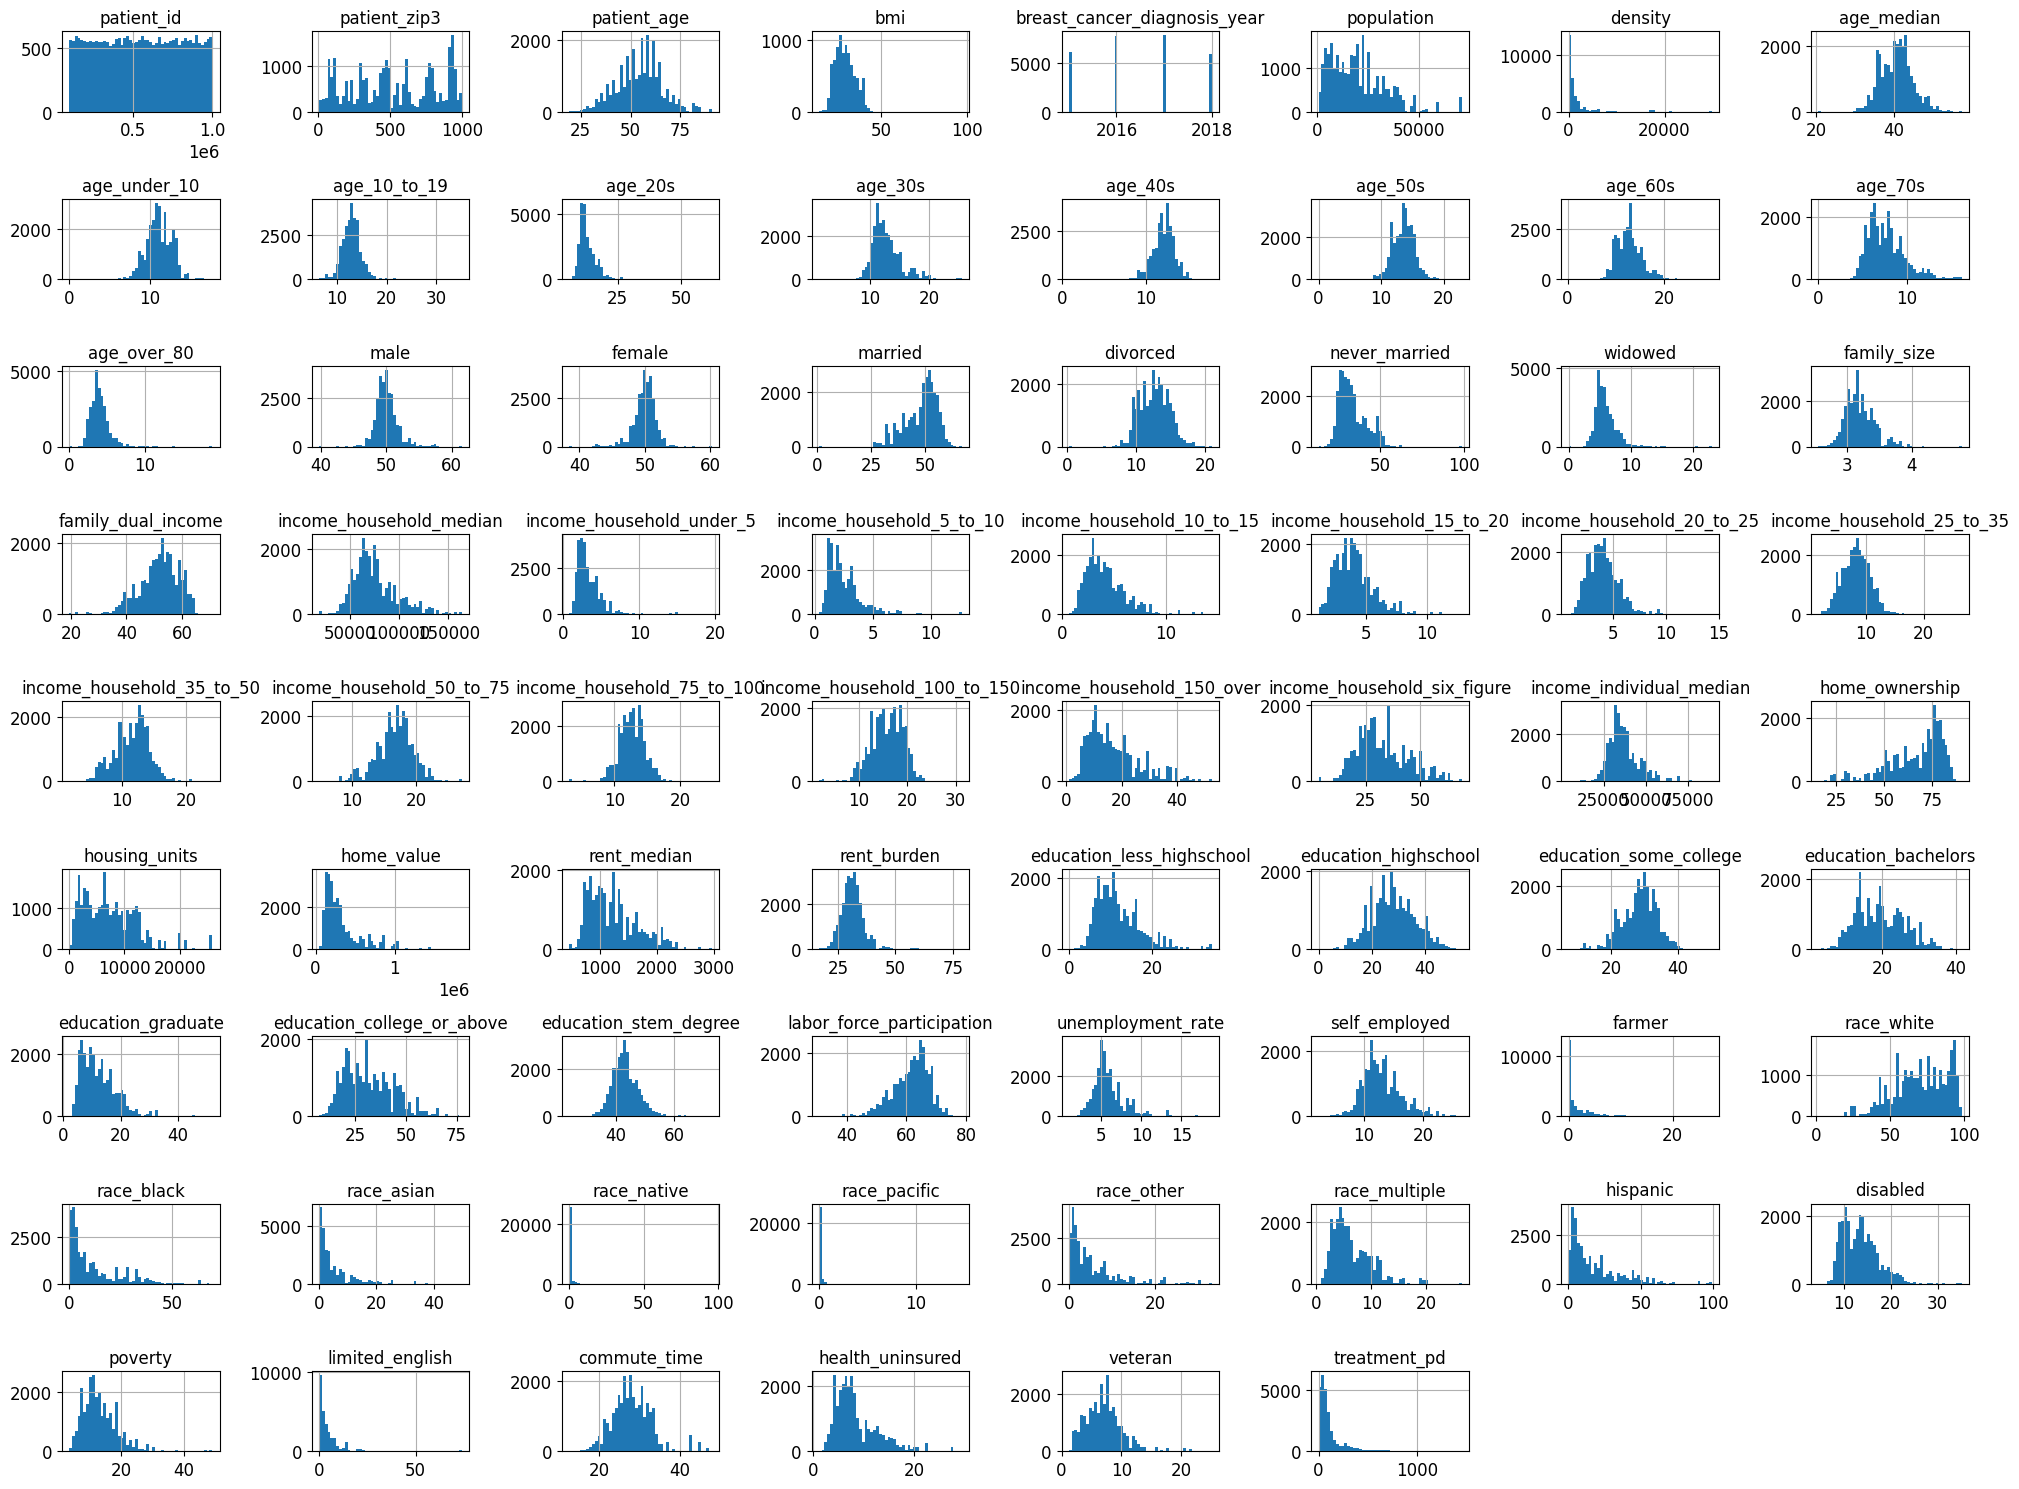

In [110]:
### See histograms ###
data.hist(bins=50, figsize=(20, 15))
save_fig("attribute_histograms_plots")
plt.show()

# **Create a Test Set**

We split the data into training and testing sets while preserving the class proportions present in the original data.

In [111]:
print(data["patient_age"].unique())

[46 63 53 50 39 35 58 37 67 45 47 56 29 55 60 51 65 32 48 54 33 40 62 41
 78 59 71 52 76 69 64 61 66 38 57 25 34 36 44 43 49 73 28 27 70 72 90 68
 31 42 77 84 30 82 75 74 23 26 83 24 91 22 79 20 19 21]


ValueError: Input contains NaN

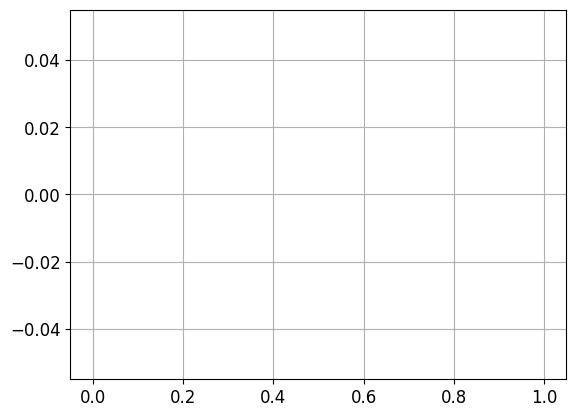

In [108]:
from sklearn.model_selection import StratifiedShuffleSplit

data["age_cat"] = pd.cut(data["patient_age"],
                         bins=[19, 30, 40, 50, 60, 70, 80, 92],
                         labels=["19-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-91"],
                         include_lowest=True)

data["age_cat"].hist()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["age_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

# Plot value counts of patient_age in the original dataset
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
data["patient_age"].value_counts().plot(kind="bar")
plt.title("Original Dataset - Patient Race")

# Plot value counts of patient_age in the stratified training set
plt.subplot(1, 2, 2)
strat_train_set["patient_age"].value_counts().plot(kind="bar")
plt.title("Stratified Training Set - Patient Age")

plt.tight_layout()
plt.show()


In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("age_cat", axis=1, inplace=True)

In [113]:
unique_values = np.sort(data["treatment_pd"].unique())
print(unique_values)

[   0    1    2 ... 1446 1448 1455]


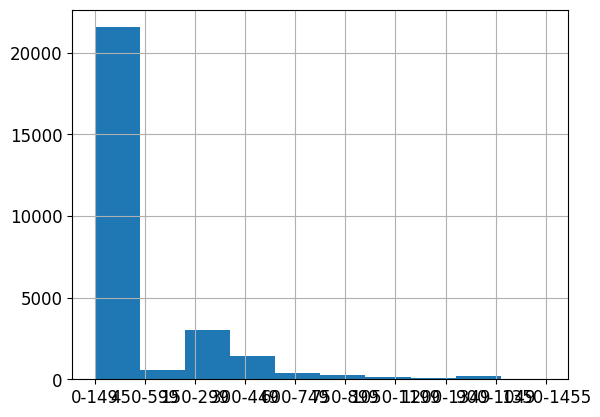

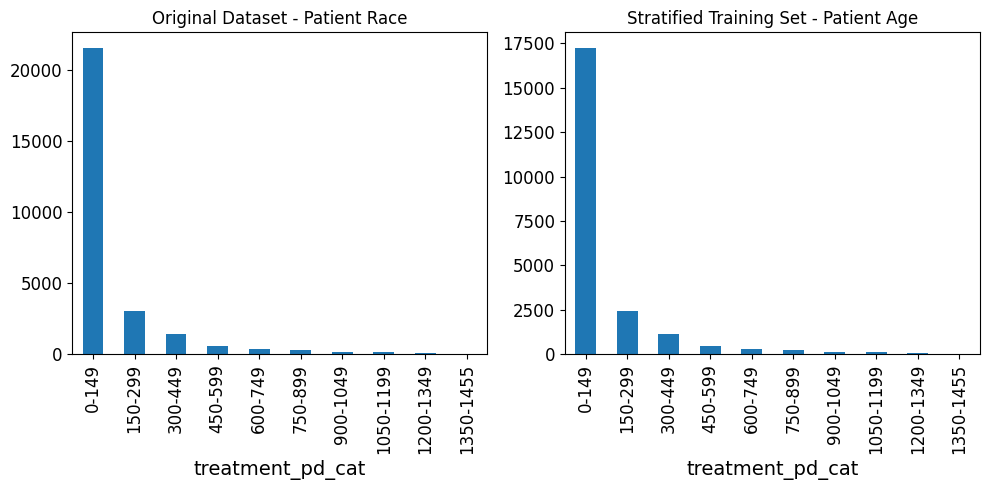

In [114]:
from sklearn.model_selection import StratifiedShuffleSplit

data["treatment_pd_cat"] = pd.cut(data["treatment_pd"],
                         bins=[0, 150, 300, 450, 600, 750, 900, 1050, 1200, 1350, 1455],
                         labels=["0-149", "150-299", "300-449", "450-599", "600-749", "750-899", "900-1049", "1050-1199", "1200-1349", "1350-1455"],
                         include_lowest=True)

data["treatment_pd_cat"].hist()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["treatment_pd_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

# Plot value counts of patient_age in the original dataset
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
data["treatment_pd_cat"].value_counts().plot(kind="bar")
plt.title("Original Dataset - Patient Race")

# Plot value counts of patient_age in the stratified training set
plt.subplot(1, 2, 2)
strat_train_set["treatment_pd_cat"].value_counts().plot(kind="bar")
plt.title("Stratified Training Set - Patient Age")

plt.tight_layout()
plt.show()

In [115]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("treatment_pd_cat", axis=1, inplace=True)

# **Discover and visualize data to gain insights**

In [116]:
data = strat_train_set.copy()

Saving figure data_scatterplot


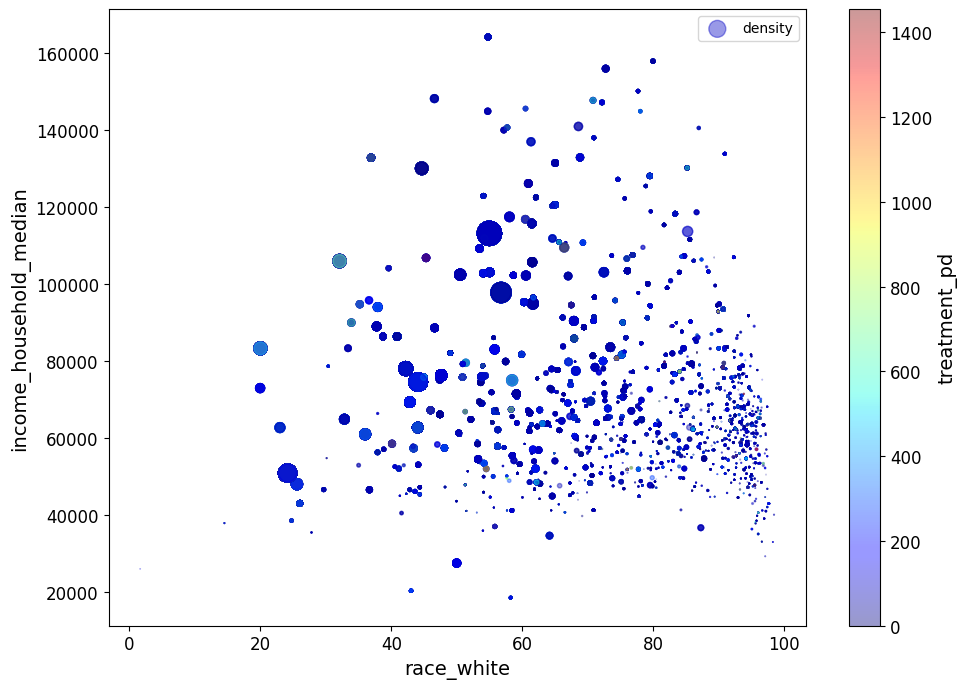

In [117]:
### Discover and visualize data to gain insights ###
data.plot(kind="scatter", x="race_white", y="income_household_median", alpha=0.4,
          s=data["density"] / 100, label="density", figsize=(10, 7),
          c="treatment_pd", cmap=plt.get_cmap("jet"), colorbar=True,
          sharex=False)
plt.legend()
save_fig("data_scatterplot")

# **Looking for correlations**

treatment_pd                    1.000000
patient_age                     0.065809
rent_median                     0.039102
home_value                      0.037101
rent_burden                     0.036046
                                  ...   
income_household_50_to_75      -0.031898
race_white                     -0.032646
farmer                         -0.036366
income_household_35_to_50      -0.040412
breast_cancer_diagnosis_year   -0.398911
Name: treatment_pd, Length: 70, dtype: float64
Saving figure scatter_matrix_plot
Saving figure age_vs_treatment_pd_scatterplot
income_per_family    1.000000
farmer               0.621461
age_60s              0.573726
race_white           0.552135
age_median           0.531478
                       ...   
age_30s             -0.454758
age_20s             -0.475110
never_married       -0.508544
population          -0.634451
housing_units       -0.637016
Name: income_per_family, Length: 71, dtype: float64
Saving figure income_per_family_scatterp

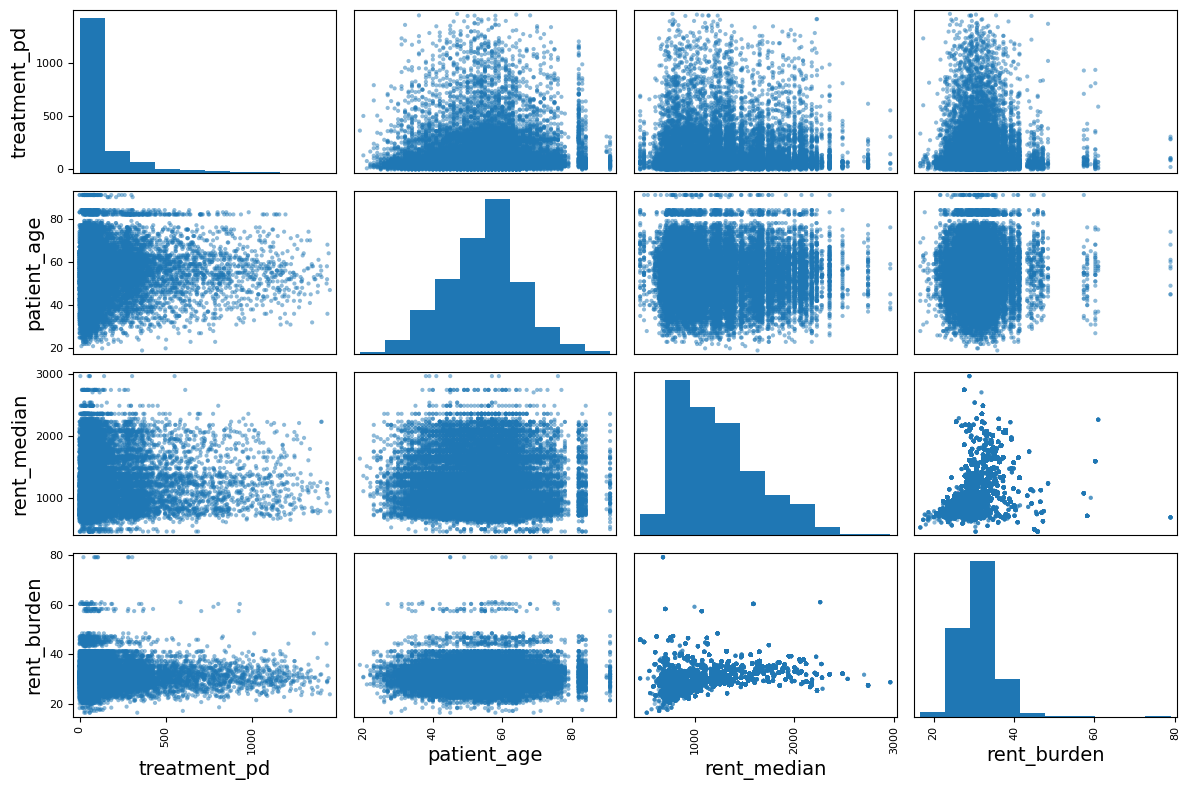

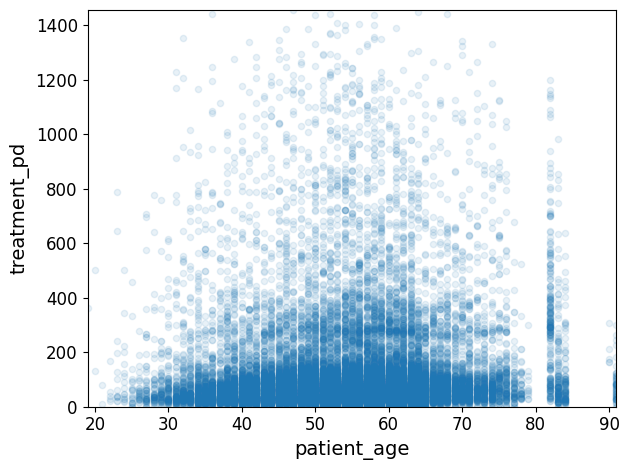

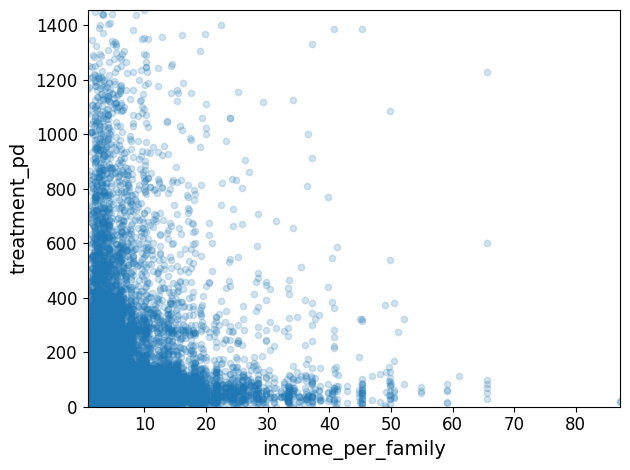

In [118]:
### Looking for correlations ###
# Exclude non-numeric columns from sorting
numeric_cols = data.select_dtypes(include=[np.number])

corr_matrix = numeric_cols.corr()

print(corr_matrix["treatment_pd"].sort_values(ascending=False))

# Now we want to see the correlations on a graphic
attributes = ["treatment_pd", "patient_age", "rent_median", "rent_burden"]
scatter_matrix(data[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

min_age = data["patient_age"].min()
max_age = data["patient_age"].max()
min_treatment_pd = data["treatment_pd"].min()
max_treatment_pd = data["treatment_pd"].max()

data.plot(kind="scatter", x="patient_age", y="treatment_pd", alpha=0.1)
plt.axis((min_age, max_age, min_treatment_pd, max_treatment_pd))
save_fig("age_vs_treatment_pd_scatterplot")

# Experimenting with attribute combinations
data["income_per_family"] = data["income_household_median"] / data["population"]
numeric_cols = data.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

print(corr_matrix["income_per_family"].sort_values(ascending=False))

min_income = data["income_per_family"].min()
max_income = data["income_per_family"].max()
min_treatment_pd = data["treatment_pd"].min()
max_treatment_pd = data["treatment_pd"].max()

data.plot(kind="scatter", x="income_per_family", y="treatment_pd",
             alpha=0.2)
plt.axis((min_income, max_income, min_treatment_pd, max_treatment_pd))
save_fig("income_per_family_scatterplot")

# **Prepare the Data for Machine Learning Algorithms**

# **1. Data cleaning**

In [119]:
def get_null_percentages(data):
  # Get the total number of rows in the DataFrame
  total_rows = len(data)

  # Calculate the number of null values in each column
  null_counts = data.isna().sum()

  # Calculate the percentage of null values for each column
  # Divide null counts by total rows and multiply by 100 for percentage
  percent_null = (null_counts / total_rows) * 100

  filtered_nulls = percent_null[percent_null > 0]

  return filtered_nulls

In [120]:
pd.set_option('display.max_rows', 100)

filtered_nulls = get_null_percentages(data)

percent_null_sorted = filtered_nulls.sort_values(ascending=False)

print(percent_null_sorted)

pd.reset_option('display.max_rows')

metastatic_first_novel_treatment         99.128235
metastatic_first_novel_treatment_type    99.128235
bmi                                      68.580333
patient_race                             54.672749
metastatic_first_treatment_type          39.825647
payer_type                               10.190162
farmer                                    8.017526
self_employed                             8.017526
region                                    0.826596
division                                  0.826596
patient_state                             0.293600
home_value                                0.013551
income_household_six_figure               0.013551
home_ownership                            0.013551
poverty                                   0.013551
rent_median                               0.013551
rent_burden                               0.013551
income_household_100_to_150               0.013551
limited_english                           0.013551
income_household_150_over      

We can see that *metastatic_first_novel_treatment* and *metastatic_first_novel_treatment_type* features have over 99% missing values, suggesting they might not be very informative in our analysis, so we can drop them.

In [121]:
data = data.drop(columns=['metastatic_first_novel_treatment',
                          'metastatic_first_novel_treatment_type',
                          'bmi'])

For *patient_race* we create a new category ("Race Unknown"), because we don't want to assign races to individuals when they are unknown, since the percentage of the null cells is quite high.

In [122]:
data['patient_race'] = data['patient_race'].fillna('Race Unknown')

For *metastatic_first_treatment_type*        we create a new category ("Unknown"), because we don't want to assign treatments to individuals when they are unknown, since the percentage of the null cells is quite high.

In [123]:
data['metastatic_first_treatment_type'] = data['metastatic_first_treatment_type'].fillna('Unknown')

Now we want to check if the lower percentage features are left-skewed, right-skewed or normal to see what we have to do.

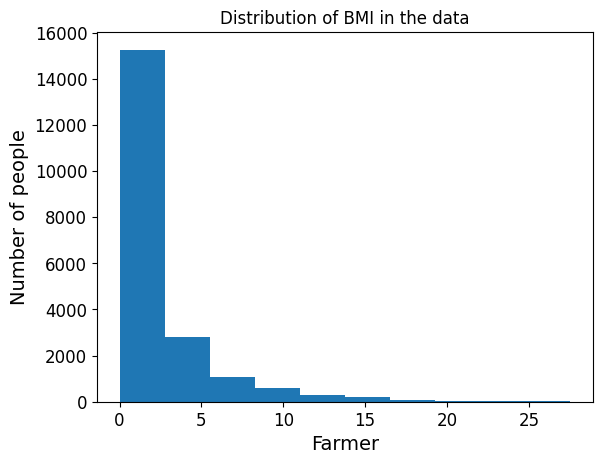

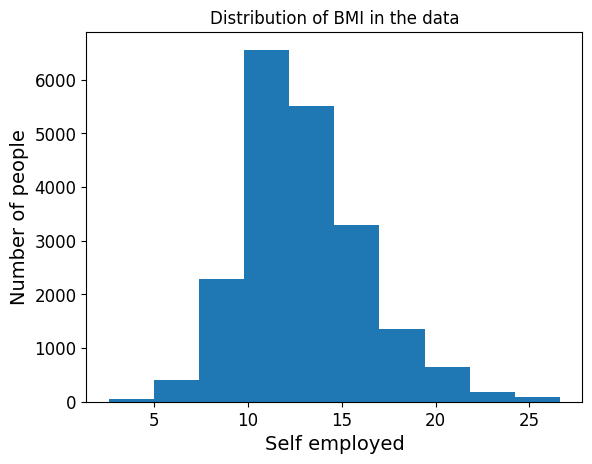

In [124]:
plt.hist(data['farmer'])
plt.xlabel('Farmer')
plt.ylabel('Number of people')
plt.title('Distribution of BMI in the data')
plt.show()

plt.hist(data['self_employed'])
plt.xlabel('Self employed')
plt.ylabel('Number of people')
plt.title('Distribution of BMI in the data')
plt.show()

Since they are both right-skewed and percentages represent categorical values, we replace the null values with the mode.

In [125]:
def compute_mode(data_series):
  # Count occurrences of each unique value
  value_counts = data_series.value_counts()

  # Get the mode(s) - values with the highest count
  mode_values = value_counts[value_counts == value_counts.max()]

  # Return the mode(s) as a list
  return mode_values.index.tolist()

self_employed_mode = compute_mode(data['self_employed'])
farmer_mode = compute_mode(data['farmer'])

data['self_employed'] = data['self_employed'].fillna(self_employed_mode[0])
data['farmer'] = data['farmer'].fillna(farmer_mode[0])

We compute the mode for *payer_type*

In [126]:
payer_type_mode = compute_mode(data['payer_type'])

# Replace missing values with the mode (assuming single mode)
data['payer_type'] = data['payer_type'].fillna(payer_type_mode[0])

We will drop the rows containing missing values for features that have a missing percentage of less than 1.0.

In [127]:
# Threshold for number of missing values percentage
threshold = 1.0

# Features to drop based on number of missing values
features_to_drop = filtered_nulls[filtered_nulls <= threshold].index.tolist()

# Drop rows with missing values in the specified features
data = data.dropna(subset=features_to_drop)

Delete the *patient_gender* column, because all the patients are female.

In [128]:
data.drop("patient_gender", axis=1, inplace=True)

Delete *breast_cancer_diagnosis_desc*.

In [129]:
data.drop("breast_cancer_diagnosis_desc", axis=1, inplace=True)

In [130]:
data.drop("breast_cancer_diagnosis_code", axis=1, inplace=True)
data.drop("metastatic_cancer_diagnosis_code", axis=1, inplace=True)
data.drop("metastatic_first_treatment", axis=1, inplace=True)
data.drop("metastatic_first_treatment_type", axis=1, inplace=True)

**Now we need to scale some features.**

In [131]:
from sklearn.preprocessing import MinMaxScaler

def scale_features(data):
  features_to_scale = ['patient_age', 'income_household_median', 'income_individual_median', 'rent_median', 'home_value', 'density', 'housing_units', 'population', 'income_per_family', 'breast_cancer_diagnosis_year']

  scaler = MinMaxScaler(feature_range=(0, 1))

  scaler.fit(data[features_to_scale])

  data_scaled = data.copy()
  data_scaled[features_to_scale] = scaler.transform(data[features_to_scale])

  return data_scaled

In [132]:
data = scale_features(data)

# **Select and Train a Model**

In [133]:
data_X = data.drop("treatment_pd", axis=1) # drop labels for training set
data_labels = data["treatment_pd"]

# **0. Chossing only important features**

In [134]:
important_features = ['patient_age', 'population', 'density', 'breast_cancer_diagnosis_year', 'patient_race', 'payer_type', 'income_per_family']

X = data[important_features]

X.describe()

,patient_age,population,density,breast_cancer_diagnosis_year,income_per_family
count,21953.000000,21953.000000,21953.000000,21953.000000,21953.000000
mean,0.491915,0.270162,0.055518,0.494268,0.065780
std,0.155253,0.190620,0.122635,0.352476,0.073839
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.388889,0.115578,0.005645,0.333333,0.021546
50%,0.500000,0.244849,0.021007,0.333333,0.040347
75%,0.597222,0.378779,0.052068,0.666667,0.080822
max,1.000000,1.000000,1.000000,1.000000,1.000000


Handling the *patient_race* attribute

In [135]:
def encode_patient_race(X):
  encoder = OneHotEncoder(sparse_output=False)

  race_encoded = encoder.fit_transform(X[['patient_race']])

  # Create a DataFrame for the encoded race features
  race_df = pd.DataFrame(race_encoded, columns=encoder.get_feature_names_out(['patient_race']))

  # Reset the indices of 'X' and 'race_df'
  X.reset_index(drop=True, inplace=True)
  race_df.reset_index(drop=True, inplace=True)

  # Concatenate the original features with the encoded race features
  X_new = pd.concat([X, race_df], axis=1)

  X_new = X_new.drop(columns=['patient_race'], axis=1)

  return X_new

In [136]:
X_new = encode_patient_race(X)

Handling the *payer_type* attribute

In [137]:
def encode_payer_type(X):
  encoder = OneHotEncoder(sparse_output=False)

  payer_type_encoded = encoder.fit_transform(X[['payer_type']])

  # Create a DataFrame for the encoded race features
  payer_type_df = pd.DataFrame(payer_type_encoded, columns=encoder.get_feature_names_out(['payer_type']))

  # Reset the indices of 'X' and 'race_df'
  X.reset_index(drop=True, inplace=True)
  payer_type_df.reset_index(drop=True, inplace=True)

  # Concatenate the original features with the encoded race features
  X_new = pd.concat([X, payer_type_df], axis=1)

  X_new = X_new.drop(columns=['payer_type'], axis=1)

  return X_new

In [138]:
X_new = encode_payer_type(X_new)

Preparing test data.

In [139]:
test_data = strat_test_set.copy()

test_data["income_per_family"] = test_data["income_household_median"] / test_data["population"]

filtered_nulls = get_null_percentages(test_data)

test_data['patient_race'] = test_data['patient_race'].fillna('Race Unknown')

payer_type_mode = compute_mode(test_data['payer_type'])

# Replace missing values with the mode (assuming single mode)
test_data['payer_type'] = test_data['payer_type'].fillna(payer_type_mode[0])

# Threshold for number of missing values percentage
threshold = 1.0

# Features to drop based on number of missing values
features_to_drop = filtered_nulls[filtered_nulls <= threshold].index.tolist()

# Drop rows with missing values in the specified features
test_data = test_data.dropna(subset=features_to_drop)

test_data = scale_features(test_data)
X = test_data[important_features]
X_test = encode_patient_race(X)
X_test = encode_payer_type(X_test)

# **Regression Tree**

In [144]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y = data.treatment_pd
dataset_model = DecisionTreeRegressor(max_depth=20, random_state=42)
dataset_model.fit(X_new, y)

DecisionTreeRegressor(max_depth=20, random_state=42)

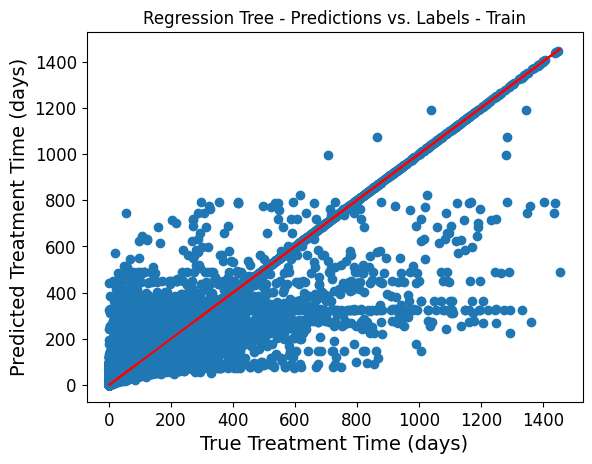

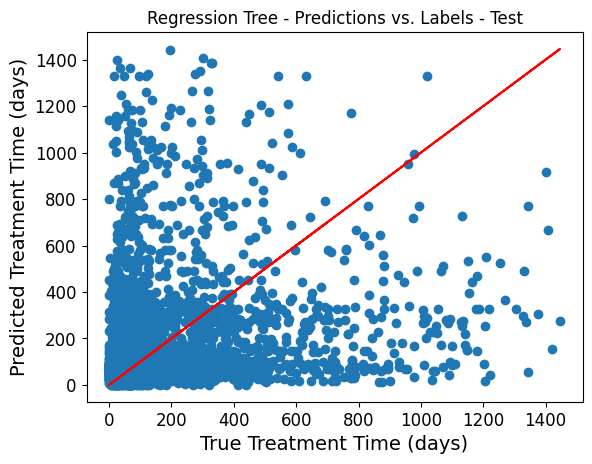

In [145]:
plt.scatter(y, dataset_model.predict(X_new))  # Plot labels on x, predictions on y
plt.xlabel("True Treatment Time (days)")  # Label x-axis
plt.ylabel("Predicted Treatment Time (days)")  # Label y-axis
plt.title("Regression Tree - Predictions vs. Labels - Train")
plt.plot(y, y, color='red')  # Plot perfect prediction line (optional)
plt.show()

y_test = test_data.treatment_pd

plt.scatter(y_test, dataset_model.predict(X_test))  # Plot labels on x, predictions on y
plt.xlabel("True Treatment Time (days)")  # Label x-axis
plt.ylabel("Predicted Treatment Time (days)")  # Label y-axis
plt.title("Regression Tree - Predictions vs. Labels - Test")
plt.plot(y_test, y_test, color='red')  # Plot perfect prediction line (optional)
plt.show()

# **Random Forest**

In [146]:
from sklearn.ensemble import RandomForestRegressor

ran_forest_model = RandomForestRegressor(max_depth=20, min_samples_split=5, random_state=42)

train_y_ran = data.treatment_pd
X_train_ran = X_new

ran_forest_model.fit(X_train_ran, train_y_ran)

RandomForestRegressor(max_depth=20, min_samples_split=5, random_state=42)

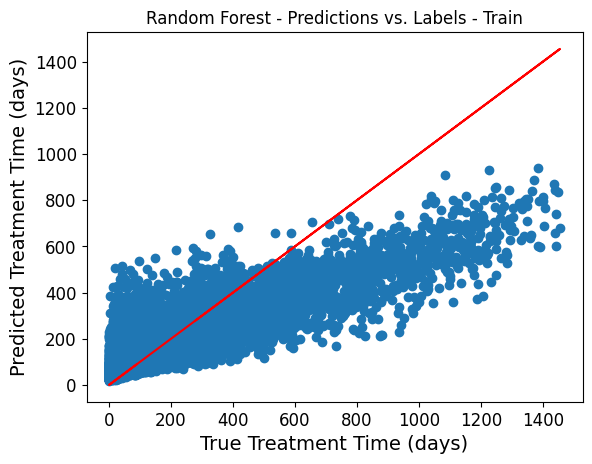

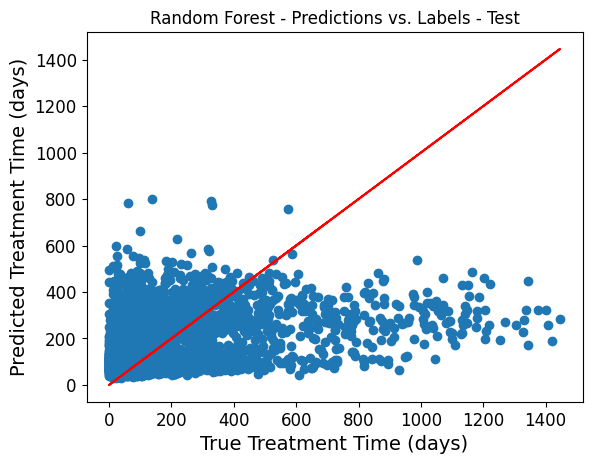

In [147]:
plt.scatter(y, ran_forest_model.predict(X_new))  # Plot labels on x, predictions on y
plt.xlabel("True Treatment Time (days)")  # Label x-axis
plt.ylabel("Predicted Treatment Time (days)")  # Label y-axis
plt.title("Random Forest - Predictions vs. Labels - Train")
plt.plot(y, y, color='red')  # Plot perfect prediction line (optional)
plt.show()

plt.scatter(y_test, ran_forest_model.predict(X_test))  # Plot labels on x, predictions on y
plt.xlabel("True Treatment Time (days)")  # Label x-axis
plt.ylabel("Predicted Treatment Time (days)")  # Label y-axis
plt.title("Random Forest - Predictions vs. Labels - Test")
plt.plot(y_test, y_test, color='red')  # Plot perfect prediction line (optional)
plt.show()

# **Custom Random Forest**

In [45]:
class RandomForestRegressorCustom:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=10):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split, min_samples_leaf=self.min_samples_leaf)
            indices = np.random.choice(len(X), len(X), replace=True)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.zeros(len(X))
        for tree in self.trees:
            predictions += tree.predict(X)
        return predictions / len(self.trees)

In [46]:
# Instantiate the RandomForestRegressorCustom
random_forest_custom = RandomForestRegressorCustom(n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=10)

# Fit the Random Forest model
random_forest_custom.fit(X_new.values, y.values)

# Make predictions using Random Forest model
random_forest_predictions = random_forest_custom.predict(X_new.values)

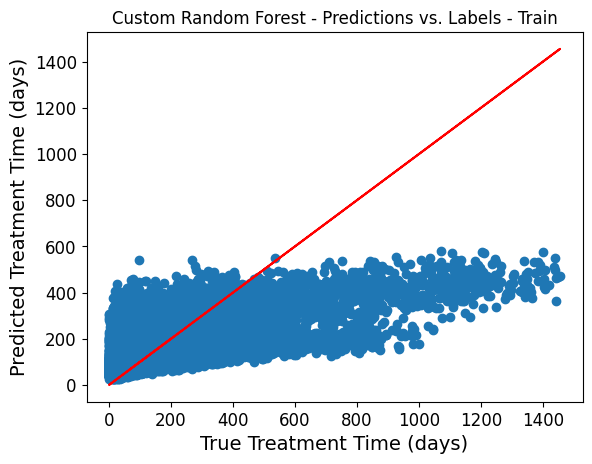

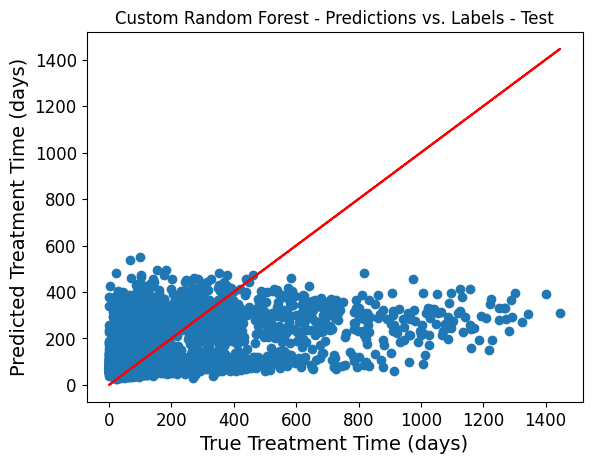

In [72]:
plt.scatter(y, random_forest_custom.predict(X_new.values))  # Plot labels on x, predictions on y
plt.xlabel("True Treatment Time (days)")  # Label x-axis
plt.ylabel("Predicted Treatment Time (days)")  # Label y-axis
plt.title("Custom Random Forest - Predictions vs. Labels - Train")
plt.plot(y, y, color='red')  # Plot perfect prediction line (optional)
plt.show()

plt.scatter(y_test, random_forest_custom.predict(X_test.values))  # Plot labels on x, predictions on y
plt.xlabel("True Treatment Time (days)")  # Label x-axis
plt.ylabel("Predicted Treatment Time (days)")  # Label y-axis
plt.title("Custom Random Forest - Predictions vs. Labels - Test")
plt.plot(y_test, y_test, color='red')  # Plot perfect prediction line (optional)
plt.show()

# **Bagging**

In [160]:
class BaggingRegressorCustom:
    def __init__(self, base_estimator, n_estimators=100):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.models = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            model = self.base_estimator()
            indices = np.random.choice(len(X), len(X), replace=True)
            model.fit(X[indices], y[indices])
            self.models.append(model)

    def predict(self, X):
        predictions = np.zeros(len(X))
        for model in self.models:
            predictions += model.predict(X)
        return predictions / len(self.models)

    def get_params(self, deep=True):
        return {'base_estimator': self.base_estimator, 'n_estimators': self.n_estimators}

In [161]:
# Instantiate the BaggingRegressorCustom with DecisionTreeRegressorCustom as the base estimator
bagging_custom = BaggingRegressorCustom(base_estimator=DecisionTreeRegressor, n_estimators=100)

# Fit the Bagging model
bagging_custom.fit(X_new.values, y.values)

# Make predictions using Bagging model
bagging_predictions = bagging_custom.predict(X_new.values)

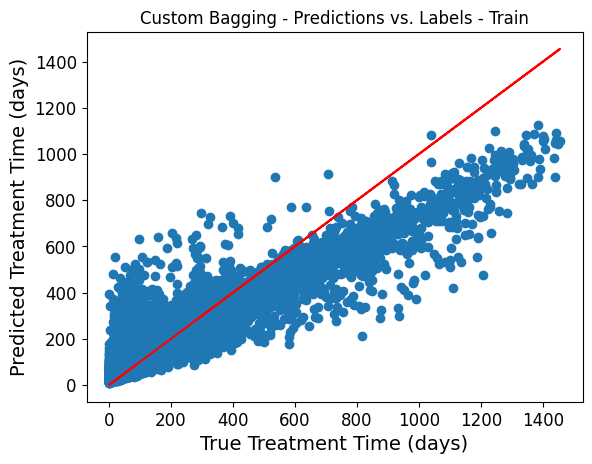

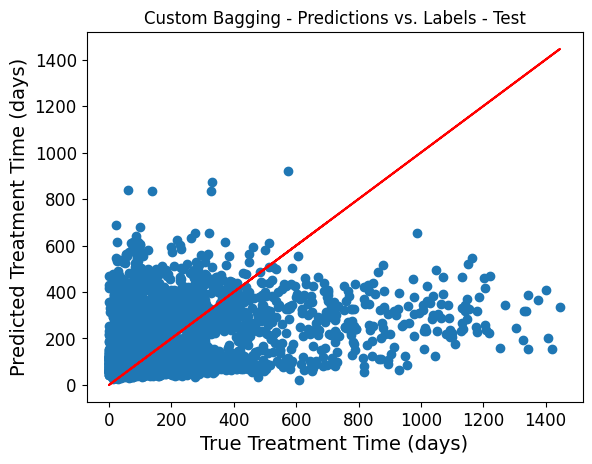

In [168]:
plt.scatter(y, bagging_custom.predict(X_new.values))  # Plot labels on x, predictions on y
plt.xlabel("True Treatment Time (days)")  # Label x-axis
plt.ylabel("Predicted Treatment Time (days)")  # Label y-axis
plt.title("Custom Bagging - Predictions vs. Labels - Train")
plt.plot(y, y, color='red')  # Plot perfect prediction line (optional)
plt.show()

plt.scatter(y_test, bagging_custom.predict(X_test.values))  # Plot labels on x, predictions on y
plt.xlabel("True Treatment Time (days)")  # Label x-axis
plt.ylabel("Predicted Treatment Time (days)")  # Label y-axis
plt.title("Custom Bagging - Predictions vs. Labels - Test")
plt.plot(y_test, y_test, color='red')  # Plot perfect prediction line (optional)
plt.show()

Bagging from sklearn:

In [165]:
from sklearn.ensemble import BaggingRegressor

bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)

bagging_regressor.fit(X_new, y)

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=42)

# **Evaluate:**

Use cross validation to see which model is better.

In [167]:
from sklearn.model_selection import cross_val_score

random_forest_scores = cross_val_score(ran_forest_model, X_new, y, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

random_forest_mse_scores = -random_forest_scores

print("Random forest: Mean MSE:", random_forest_mse_scores.mean())
print("Random forest: Standard deviation of MSE:", random_forest_mse_scores.std())

bagging_scores = cross_val_score(bagging_regressor, X_new, y, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

bagging_mse_scores = -bagging_scores

print("Bagging: Mean MSE:", bagging_mse_scores.mean())
print("Bagging: Standard deviation of MSE:", bagging_mse_scores.std())

Random forest: Mean MSE: 102.81757599540258
Random forest: Standard deviation of MSE: 0.9713481627600971
Bagging: Mean MSE: 106.71152767048643
Bagging: Standard deviation of MSE: 1.0467197960487986


In [62]:
print("Regression tree on train: ", mean_absolute_error(y, dataset_model.predict(X_new)))
print("Regression tree on test: ", mean_absolute_error(y_test, dataset_model.predict(X_test))) # same but on test

Regression tree on train:  38.03444252768426
Regression tree on test:  126.2973780909923


In [150]:
print("Random forest on train: ", mean_absolute_error(y, ran_forest_model.predict(X_new)))
print("Random forest on train: ", mean_absolute_error(y_test, ran_forest_model.predict(X_test)))

Random forest on train:  63.89190489462884
Random forest on train:  104.71074452779071


In [65]:
print("Custom random forest on train: ", mean_absolute_error(y, random_forest_predictions))
print("Custom random forest on test: ", mean_absolute_error(y_test, random_forest_custom.predict(X_test.values)))

Custom random forest on train:  79.49933622505336
Custom random forest on test:  98.16247277323752


In [166]:
print("Bagging on train: ", mean_absolute_error(y, bagging_regressor.predict(X_new)))
print("Bagging forest on test: ", mean_absolute_error(y_test, bagging_regressor.predict(X_test)))

Bagging on train:  43.724008611394986
Bagging forest on test:  107.93005140709053


In [66]:
print("Custom bagging on train: ", mean_absolute_error(y, bagging_predictions))
print("Custom bagging forest on test: ", mean_absolute_error(y_test, bagging_custom.predict(X_test.values)))

Custom bagging on train:  43.63181687426373
Custom bagging forest on test:  105.46669636400314


# **KNN**

In [ ]:
class KNNRegressorCustom:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for i, x_test in enumerate(X):
          # Efficient distance calculation using vectorized norm
          distances = np.linalg.norm(self.X_train - x_test, axis=1)

          # Early stopping during neighbor search (optional)
          # Uncomment the following lines to enable early stopping
          # nearest_neighbors_idx = np.argsort(distances)[:self.n_neighbors]
          # if distances[nearest_neighbors_idx[-1]] > some_threshold:
          #   # All remaining neighbors likely have similar distances, stop searching
          #   break

          # Sort neighbors by distance and select the closest k
          nearest_neighbors_idx = np.argsort(distances)[:self.n_neighbors]

          # Predict by averaging labels of nearest neighbors
          y_pred[i] = np.mean(self.y_train[nearest_neighbors_idx])
        return y_pred

In [ ]:
knn_regressor_custom = KNNRegressorCustom(n_neighbors=3)
knn_regressor_custom.fit(X_new.values, y.values)

knn_predictions = knn_regressor_custom.predict(X_new.values)

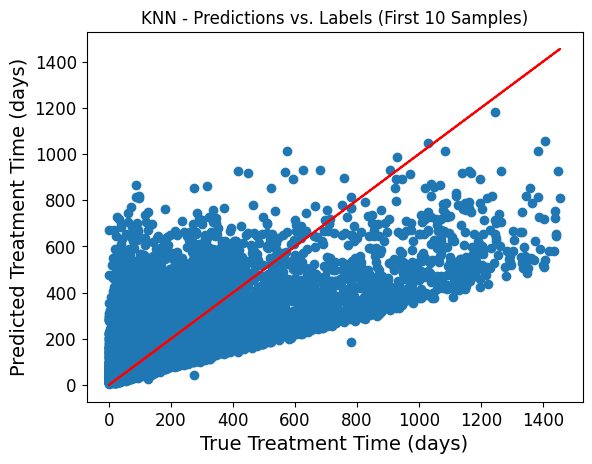

In [ ]:
plt.scatter(y, knn_predictions)  # Plot labels on x, predictions on y
plt.xlabel("True Treatment Time (days)")  # Label x-axis
plt.ylabel("Predicted Treatment Time (days)")  # Label y-axis
plt.title("KNN - Predictions vs. Labels (First 10 Samples)")
plt.plot(y, y, color='red')  # Plot perfect prediction line (optional)
plt.show()

# **Neural Network**

**The scikit implementation**

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_subset = X_new
y_subset = y

mlp_regressor = MLPRegressor(hidden_layer_sizes=(200, 100), activation='relu', solver='adam',
                             alpha=0.001, batch_size='auto', learning_rate='constant',
                             learning_rate_init=0.001, max_iter=300, shuffle=True,
                             random_state=42)

mlp_regressor.fit(X_subset, y_subset)

predictions = mlp_regressor.predict(X_subset)

print(mean_absolute_error(y_subset, predictions))

95.39836330273349


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

X_tensor = torch.tensor(X_new.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

Define the Neural Network Architecture:

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc4 = nn.Linear(hidden_size3, hidden_size4)
        self.fc5 = nn.Linear(hidden_size4, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Define the input size, hidden layer sizes
input_size = X_new.shape[1]  # Assuming num_features is the number of features in your dataset
hidden_size1 = 64
hidden_size2 = 32
hidden_size3 = 32
hidden_size4 = 32

model = NeuralNetwork(input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4)

Define the Loss Function and Optimizer:

In [ ]:
criterion = nn.MSELoss()  # Mean Squared Error loss for regression tasks
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam optimizer with learning rate 0.001

Train the Model:

In [ ]:
num_epochs = 50
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    optimizer.zero_grad()  # Clear gradients
    outputs = model(X_tensor)  # Forward pass
    loss = criterion(outputs, y_tensor)  # Compute the loss
    loss.backward()  # Backward pass
    optimizer.step()  # Update weights

    # Print training loss for every epoch (optional)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([21952])) that is different to the input size (torch.Size([21952, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/50], Loss: 52830.4805
Epoch [2/50], Loss: 52791.1406
Epoch [3/50], Loss: 52746.4375
Epoch [4/50], Loss: 52677.7461
Epoch [5/50], Loss: 52565.8047
Epoch [6/50], Loss: 52387.2656
Epoch [7/50], Loss: 52106.9766
Epoch [8/50], Loss: 51675.9531
Epoch [9/50], Loss: 51033.6875
Epoch [10/50], Loss: 50105.3594
Epoch [11/50], Loss: 48803.9453
Epoch [12/50], Loss: 47041.7930
Epoch [13/50], Loss: 44758.2930
Epoch [14/50], Loss: 41974.8438
Epoch [15/50], Loss: 38908.3672
Epoch [16/50], Loss: 36205.0977
Epoch [17/50], Loss: 35348.0000
Epoch [18/50], Loss: 37895.1562
Epoch [19/50], Loss: 39567.2344
Epoch [20/50], Loss: 38452.7266
Epoch [21/50], Loss: 36602.3242
Epoch [22/50], Loss: 35450.3281
Epoch [23/50], Loss: 35258.5742
Epoch [24/50], Loss: 35657.1289
Epoch [25/50], Loss: 36210.5234
Epoch [26/50], Loss: 36647.1289
Epoch [27/50], Loss: 36851.9219
Epoch [28/50], Loss: 36805.5625
Epoch [29/50], Loss: 36543.0508
Epoch [30/50], Loss: 36136.7266
Epoch [31/50], Loss: 35691.2148
Epoch [32/50], Lo

Evaluate the Model

In [ ]:
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    print('Test Loss:', loss.item())

Test Loss: 35239.296875


Make Predictions:

In [ ]:
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    ML_predictions = model(X_tensor)

# **Evaluation**

In [ ]:
print(mean_absolute_error(y, dataset_model.predict(X_new)))
print(mean_absolute_error(y_test, dataset_model.predict(X_test))) # same but on test
print(mean_absolute_error(y, knn_predictions))
print(mean_absolute_error(y, ML_predictions))

38.03444252768426
126.2973780909923


NameError: name 'custom_tree' is not defined